In [1]:
from top2vec import Top2Vec

In [2]:
import pandas as pd
df = pd.read_csv('top2vecDoc.csv')

In [8]:
df.head(1)

,abstract,fully_cleaned_abstract
0,comparative evaluation national survey data i...,comparative evaluation national survey data im...


In [7]:
from nltk.corpus import stopwords
mystopwords = set(stopwords.words('english'))
df['fully_cleaned_abstract'] = df['abstract'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in mystopwords]))

In [9]:
docs = list(df.loc[:, "fully_cleaned_abstract"].values)

In [10]:
top_model = Top2Vec(docs, embedding_model='universal-sentence-encoder')

2022-08-03 20:07:41,487 - top2vec - INFO - Pre-processing documents for training
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-08-03 20:07:42,872 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-08-03 20:09:53.619298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-03 20:10:04,029 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-08-03 20:10:07,285 - top2vec - INFO - Creating lower dimension 

In [11]:
top_model.get_num_topics()

2

In [22]:
topic_words, word_scores, topic_nums = top_model.get_topics(2)

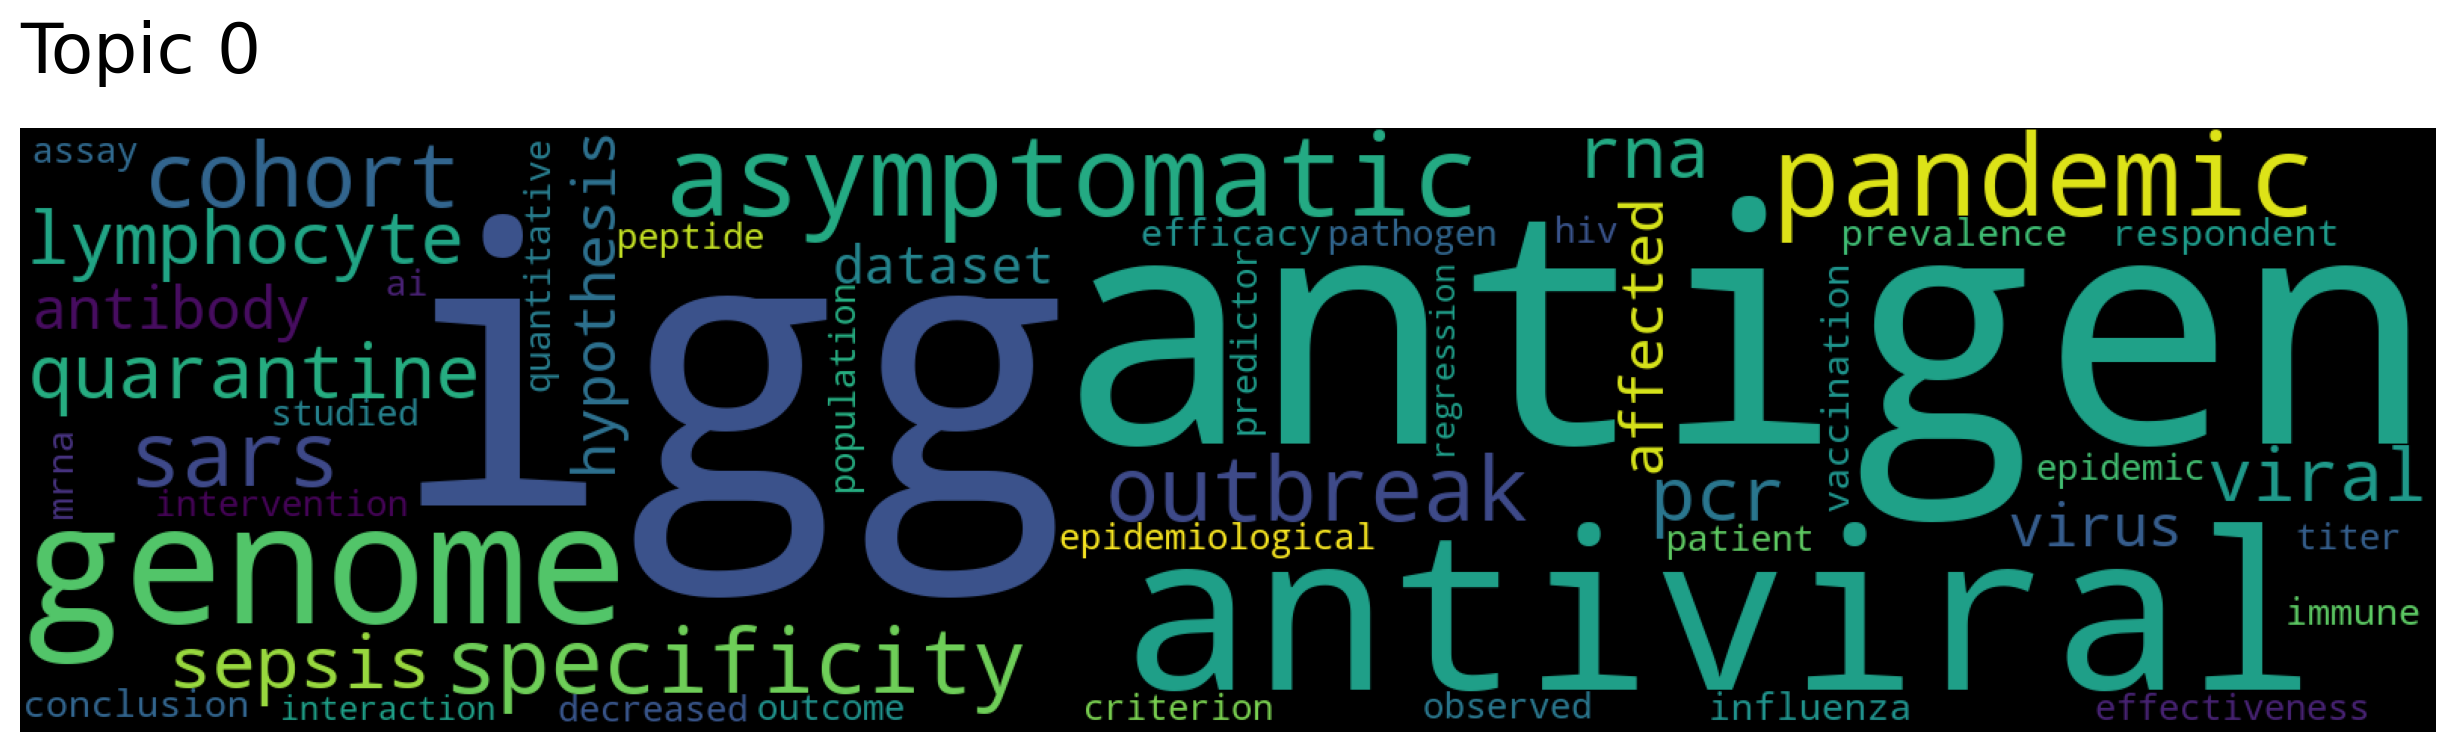

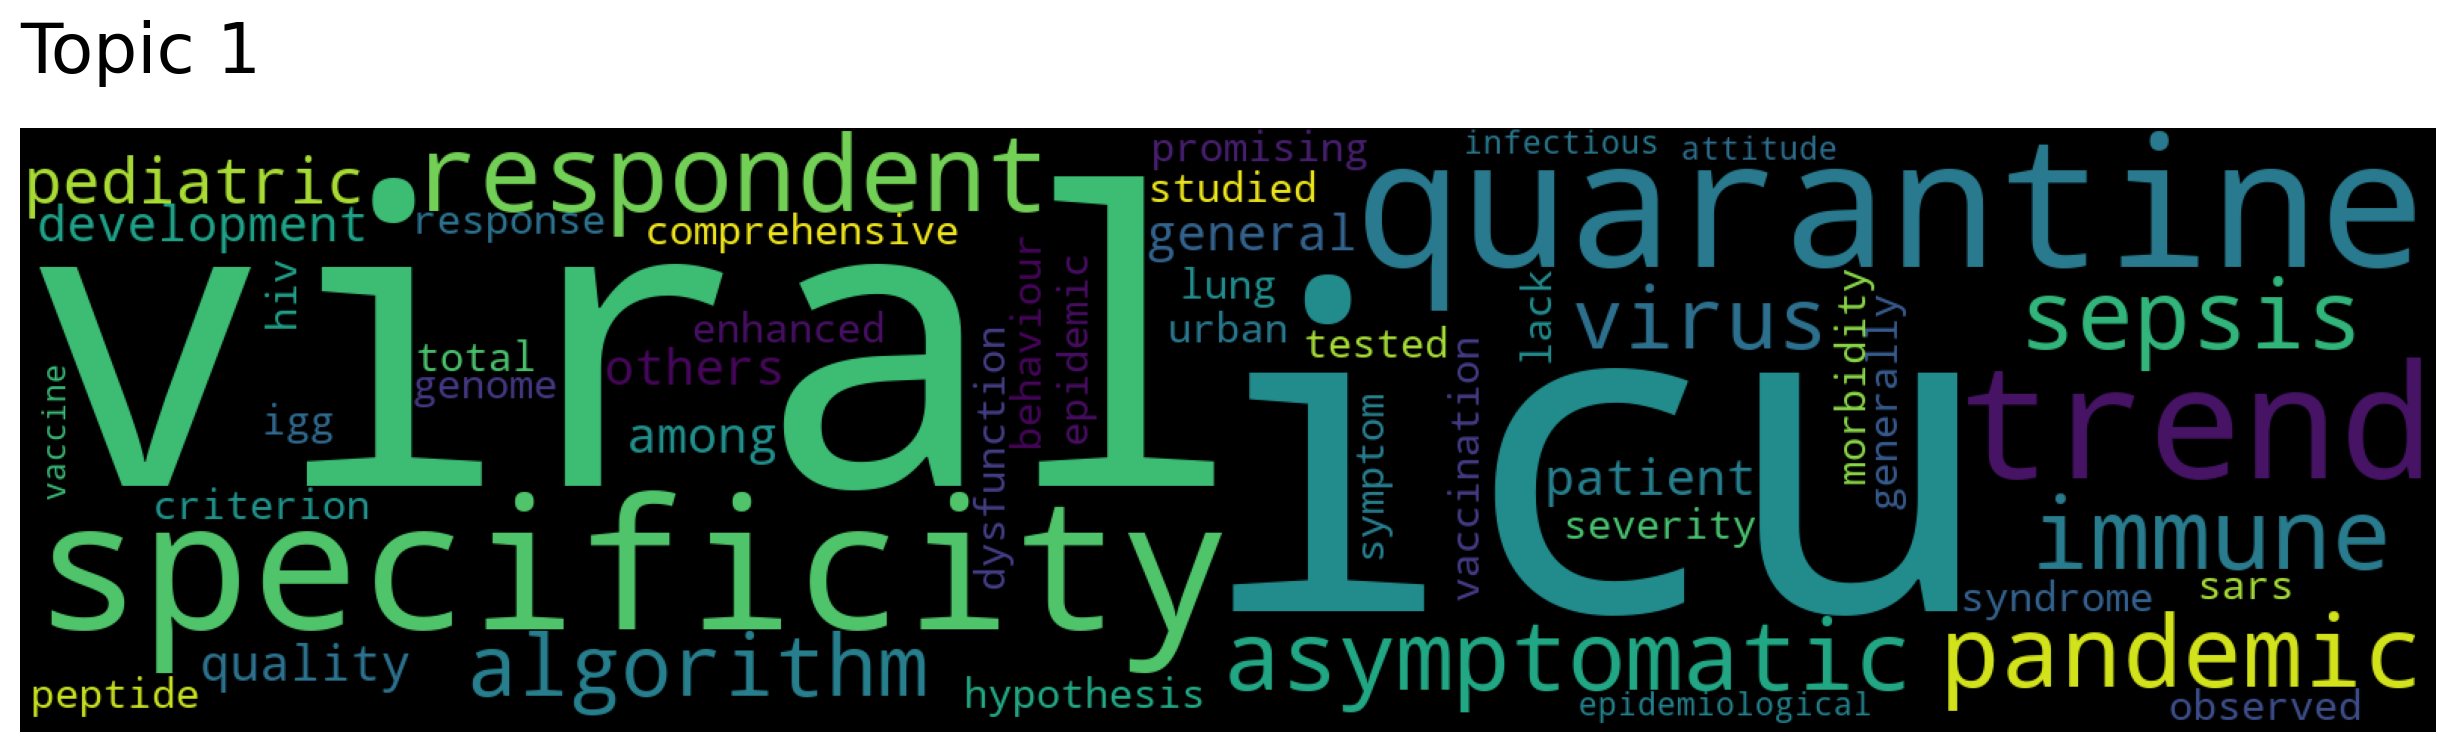

In [13]:
for topic in topic_nums:
    top_model.generate_topic_wordcloud(topic)

In [14]:
documents, document_scores, document_ids = top_model.search_documents_by_topic(topic_num=0, num_docs=5)

In [15]:
documents

array(['background adaptive_immune response covid patient contributes virus clearance restoration health protection infection pattern associated characteristic longitudinal neutralising antibody nab response following sars_cov infection important potential association population risk infection method longitudinal study blood_samples clinical data collected adults_aged following diagnosis sars_cov infection nab level measured sars_cov surrogate_virus neutralisation test svnt anonymous clinical laboratory data matched surveillance data subject enabling analysis applying latent class mixed model trajectory delineation logistic_regression model performed compare characteristic identified class result convalescent patient hong_kong tested nab seroconversion occur within month symptomatic patient level maintained month nab trajectory symptomatic patient classified initial response subsequent trend high persistent waning class latent class mixed model high persistent class patient older chron

In [16]:
document_scores

array([0.8088391 , 0.7746426 , 0.7698296 , 0.76550096, 0.7654531 ],
      dtype=float32)

In [17]:
document_ids

array([ 384,  905, 1867,  371, 2029])

In [18]:
documents, document_scores, document_ids = top_model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 384, Score: 0.8088390827178955
-----------
background adaptive_immune response covid patient contributes virus clearance restoration health protection infection pattern associated characteristic longitudinal neutralising antibody nab response following sars_cov infection important potential association population risk infection method longitudinal study blood_samples clinical data collected adults_aged following diagnosis sars_cov infection nab level measured sars_cov surrogate_virus neutralisation test svnt anonymous clinical laboratory data matched surveillance data subject enabling analysis applying latent class mixed model trajectory delineation logistic_regression model performed compare characteristic identified class result convalescent patient hong_kong tested nab seroconversion occur within month symptomatic patient level maintained month nab trajectory symptomatic patient classified initial response subsequent trend high persistent waning class latent class mixed mo

In [19]:
documents, document_scores, document_ids = top_model.search_documents_by_keywords(keywords=["covid", "outbreak"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1178, Score: 0.7771196961345469
-----------
coronavirus_disease covid
-----------

Document: 1850, Score: 0.3873287893316171
-----------
sars_cov newly_identified coronavirus
-----------

Document: 907, Score: 0.29757336908974874
-----------
word
-----------

Document: 1279, Score: 0.2743943898847625
-----------
plos_one
-----------

Document: 1603, Score: 0.24384590979225063
-----------
covid disease caused severe_acute respiratory_syndrome coronavirus
-----------



In [20]:
words, word_scores = top_model.similar_words(keywords=["pandemic"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

epidemic 0.6380563106978144
outbreak 0.6313308596162747
sars 0.561341533872282
quarantine 0.5511423228983077
influenza 0.5066098581867581
antiviral 0.44791990854010255
disease 0.44153429529883526
pathogen 0.4331192142234712
illness 0.4200797399002504
crisis 0.4192688075541564
virus 0.4131812389415722
syndrome 0.4112979717090883
mortality 0.3981865417024322
vaccine 0.39593748484010294
risk 0.3850601995931502
viral 0.38385807980798603
vaccination 0.37691234534555795
clinician 0.37562131999314563
disorder 0.3696825129617369
diagnosed 0.3674873177543134
